In [96]:
import numpy as np
from scipy import interpolate
from assimulo.solvers import IDA
from assimulo.problem import Implicit_Problem
import matplotlib.pyplot as plt
from assimulo.exception import TerminateSimulation
from time import time

from scipy.sparse import diags

%matplotlib inline

In [97]:
class Diffusion:
    D = 1e-4
    
    def __init__(self):
        tspan = 6000
        
        N = 1001
        self.N = N
        T0 = 20 * np.ones( (N, 1) ); T0[0] = 0; T0[-1] = 30
        Tprime0 = np.zeros( (N, 1) )
        
        sw0 = T0.size * [False]
        algvar = T0.size * [True]
        algvar[0]  = False
        algvar[-1] = False
        
        t0 = 0
        model = Implicit_Problem(self.equation_system, T0, Tprime0, t0, sw0 = sw0)
        
        sim = IDA(model)
        sim.algvar = algvar
        sim.make_consistent('IDA_YA_YDP_INIT')

        t, x, xp = sim.simulate(tspan, 500)
        self.t = t
        self.x = x
        self.xp = xp

        
                
    def equation_system(self, t, T, Tprime, sw):
        res = np.zeros( T.shape )
        
        Delta = 1.0 / (self.N - 1)
        
        M = diags([1, -2, 1], [-1, 0, 1], shape = (T.size, T.size) )
        
        res = Tprime -  1 / Delta**2 * self.D *  M * T
        res[0] = 0 - T[0]
        res[-1] = 30 - T[-1]
        #print(res)
        
        return res

In [98]:
start = time()
problem = Diffusion()
end = time()
print('Ellapsed time = ', end - start)
t = problem.t
print(problem.x.shape)

Final Run Statistics: --- 

 Number of steps                                 : 323
 Number of function evaluations                  : 368
 Number of Jacobian evaluations                  : 36
 Number of function eval. due to Jacobian eval.  : 36036
 Number of error test failures                   : 5
 Number of nonlinear iterations                  : 368
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                       : IDA (BDF)
 Maximal order                : 5
 Suppressed algebr. variables : False
 Tolerances (absolute)        : 1e-06
 Tolerances (relative)        : 1e-06

Simulation interval    : 0.0 - 6000.0 seconds.
Elapsed simulation time: 5.132519900000261 seconds.
Ellapsed time =  5.407215595245361
(501, 1001)


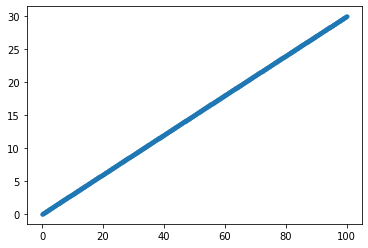

In [99]:
x = np.linspace(0, 100, problem.N)
plt.plot(x, problem.x[-1, :], '.')

In [100]:
from IPython.display import display, Markdown, Latex

In [101]:
for i in range(5):
    s = '$a_' + str(i) + '$'
    display(Markdown(s))

$a_0$

$a_1$

$a_2$

$a_3$

$a_4$

In [108]:
class DiffusionLoop:
    D = 1e-4
    
    def __init__(self):
        tspan = 6000
        
        N = 1001
        self.N = N
        T0 = 20 * np.ones( (N, 1) ); T0[0] = 0; T0[-1] = 30
        Tprime0 = np.zeros( (N, 1) )
        
        sw0 = T0.size * [False]
        algvar = T0.size * [True]
        algvar[0]  = False
        algvar[-1] = False
        
        t0 = 0
        model = Implicit_Problem(self.equation_system, T0, Tprime0, t0, sw0 = sw0)
        
        sim = IDA(model)
        sim.algvar = algvar
        sim.make_consistent('IDA_YA_YDP_INIT')

        t, x, xp = sim.simulate(tspan, 500)
        self.t = t
        self.x = x
        self.xp = xp

        
                
    def equation_system(self, t, T, Tprime, sw):
        res = np.zeros( T.shape )
        
        Delta = 1.0 / (self.N - 1)
        
        res[0] = 0 - T[0]
        res[-1] = 30 - T[-1]
        for i in range(1, T.size - 1):
            res[i] = Tprime[i] -  1 / Delta**2 * self.D * (T[i+1] - 2 * T[i] + T[i-1])
        
        return res

In [109]:
start = time()
problem = DiffusionLoop()
end = time()
print('Ellapsed time = ', end - start)
t = problem.t
print(problem.x.shape)

Final Run Statistics: --- 

 Number of steps                                 : 323
 Number of function evaluations                  : 368
 Number of Jacobian evaluations                  : 36
 Number of function eval. due to Jacobian eval.  : 36036
 Number of error test failures                   : 5
 Number of nonlinear iterations                  : 368
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                       : IDA (BDF)
 Maximal order                : 5
 Suppressed algebr. variables : False
 Tolerances (absolute)        : 1e-06
 Tolerances (relative)        : 1e-06

Simulation interval    : 0.0 - 6000.0 seconds.
Elapsed simulation time: 87.49782819999973 seconds.
Ellapsed time =  91.28960466384888
(501, 1001)


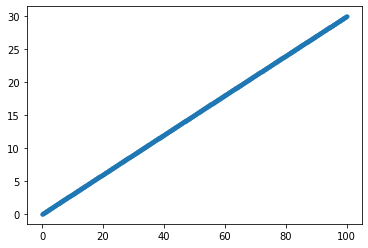

In [110]:
x = np.linspace(0, 100, problem.N)
plt.plot(x, problem.x[-1, :], '.')

In [ ]:
a = np.arange(11)
print(a)
print(a.size)
b = np.diff(a)
print(b[0])

$$
\left(
\begin{array}{l}
T_0 \\
\frac{dT_1}{dt} \\
\frac{dT_2}{dt} \\
\vdots \\
\frac{dT_{N-1}}{dt} \\
T_n
\end{array}
\right)
= \left(
\begin{matrix}
1  &  0  & 0  & 0 & \cdots & 0 & 0 \\
1  & -2  & 1  & 0 & \cdots & 0 & 0 \\
0 & 1  & -2  & 1  & \cdots & 0 & 0  \\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & 0 & 0 & 1 & -2 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 & 1
\end{matrix}
\right) \left(
\begin{array}{l}
T_0 \\
T_1 \\
T_2 \\
\vdots \\
T_{N-1} \\
T_N
\end{array}
\right)
$$